In [160]:
# basic imports
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [161]:
# Load the data as a pandas dataframe
df = pd.read_csv("periodic.csv")
#plt.plot(df["y"])

# Convert the dataframe to a numpy array (for easier manipulation)
arr = df.to_numpy()

In [162]:
# Initialize the problem parameters
params = 3 # number of parameters
s0_sqr = 100
m = np.zeros((arr.shape[0] + 1, params, 1)) # Create buffer for m matrices with size 51x3x1
p = np.zeros((arr.shape[0] + 1, params, params)) # Create buffer for m matrices with size 51x1x1

# Initialize the apriori matrices
m[0, :, 0] = np.zeros(params) # Setting m0
p[0] = s0_sqr*np.eye(params) # Setting p0

# Iterate over timepoints:
for idx,t in enumerate(arr[:, 0]):
    # Calculate the h matrix
    #import ipdb; ipdb.set_trace()
    h = np.array([[1, t, np.sin(2*np.pi*t)]])
    p[idx+1] = p[idx] - p[idx] @ h.T*inv(h @ p[idx] @ h.T + s0_sqr) @ h @ p[idx]
    m[idx+1] = p[idx+1] @ (h.T / s0_sqr * arr[idx, 1] + inv(p[idx]) @ m[idx])

print(p[5], m[5])
print(p[-1], m[-1])



[[ 31.17980408 -21.39478959  -2.02377133]
 [-21.39478959  31.56409375   3.80653564]
 [ -2.02377133   3.80653564  27.82768465]] [[0.865153  ]
 [0.57819009]
 [2.19007668]]
[[ 7.20336779e+00 -5.34743514e-01 -6.22388502e-02]
 [-5.34743514e-01  5.45438385e-02  6.34836272e-03]
 [-6.22388502e-02  6.34836272e-03  3.92230751e+00]] [[1.21949428]
 [0.17463734]
 [2.48057594]]


[1.21949428 0.17463734 2.48057594]
[2.04644285 0.1318201  1.79301777]


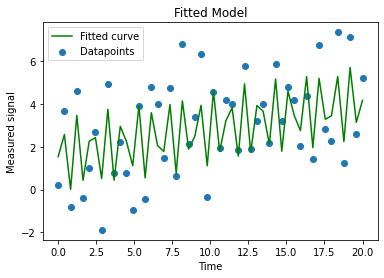

In [175]:
np.random.seed(15)
# Plot the data points, together with the fitted curve from all data
# Get the thetas from the fitted distribution
thetas = np.random.multivariate_normal(m[-1, :, 0], p[-1])
#thetas = m[-1, :, 0]
plt.scatter(arr[:, 0], arr[:, 1], label="Datapoints")
x = arr[:, 0]
plt.plot(x, thetas[0] + thetas[1]*x + thetas[2]*np.sin(2*np.pi*x) + np.random.normal(0, 1),
         label="Fitted curve", color="green")
plt.xlabel("Time")
plt.ylabel("Measured signal")
plt.title("Fitted Model")
plt.legend()
import sys
plt.savefig("Fitted_model.jpg", dpi=400)
print(m[-1, :, 0])
print(thetas)

In [169]:
p[-1]

array([[ 7.20336779e+00, -5.34743514e-01, -6.22388502e-02],
       [-5.34743514e-01,  5.45438385e-02,  6.34836272e-03],
       [-6.22388502e-02,  6.34836272e-03,  3.92230751e+00]])

In [77]:
np.random.normal(0, 1)

0.6886237633090909

In [82]:
thetas

array([[ 5.88604966, -0.17393057,  5.47317463],
       [ 7.20425584, -0.40995174,  1.23599289],
       [ 2.38741351,  0.03935723,  0.24962281]])

In [83]:
m[-1, :, 0].shape

(3,)

In [84]:
p[-1].shape

(3, 3)